In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

In [3]:
df = pd.read_csv('CarPrice.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df['CompanyName'] = df['CarName'].apply(lambda x : x.split(' ')[0])

In [ ]:
df = df.drop('CarName',axis = 1)

In [6]:
def replace_name(a,b):
    df['CompanyName'].replace(a,b,inplace = True)

In [7]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [8]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
df.columns.shape

(27,)

In [11]:
df = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'citympg','highwaympg',
                     'carlength','carwidth',]]
df

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,21,27,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,21,27,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,19,26,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,24,30,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,18,22,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,gas,std,sedan,rwd,109.1,2952,ohc,four,141,3.78,114,23,28,188.8,68.9
201,19045.0,gas,turbo,sedan,rwd,109.1,3049,ohc,four,141,3.78,160,19,25,188.8,68.8
202,21485.0,gas,std,sedan,rwd,109.1,3012,ohcv,six,173,3.58,134,18,23,188.8,68.9
203,22470.0,diesel,turbo,sedan,rwd,109.1,3217,ohc,six,145,3.01,106,26,27,188.8,68.9


In [12]:
df.columns.shape

(16,)

In [13]:
x = df.drop(columns=['price'],axis = 1)

In [14]:
x.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,21,27,168.8,64.1
1,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,21,27,168.8,64.1
2,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,19,26,171.2,65.5
3,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,24,30,176.6,66.2
4,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,18,22,176.6,66.4


In [16]:
y = df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [17]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

In [18]:
num_features

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'citympg', 'highwaympg', 'carlength', 'carwidth'],
      dtype='object')

In [19]:
cat_features

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
       'cylindernumber'],
      dtype='object')

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [22]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [23]:
x = preprocessor.fit_transform(x)

In [24]:
x.shape

(205, 35)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((164, 35), (41, 35))

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [29]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2198.2476
- Mean Absolute Error: 1628.2185
- R2 Score: 0.9190
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2958.5890
- Mean Absolute Error: 2233.0072
- R2 Score: 0.8891


Lasso
Model performance for Training set
- Root Mean Squared Error: 2198.7429
- Mean Absolute Error: 1628.1801
- R2 Score: 0.9189
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3010.3723
- Mean Absolute Error: 2286.2329
- R2 Score: 0.8852


Ridge
Model performance for Training set
- Root Mean Squared Error: 2333.4488
- Mean Absolute Error: 1726.6871
- R2 Score: 0.9087
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3193.6284
- Mean Absolute Error: 2303.8808
- R2 Score: 0.8708


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2542.7552
- Mean Absolute Error: 1583.3652


In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.956767
6,AdaBoost Regressor,0.903719
4,Decision Tree,0.895563
0,Linear Regression,0.889121
1,Lasso,0.885205
2,Ridge,0.870804
3,K-Neighbors Regressor,0.785177


In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.91


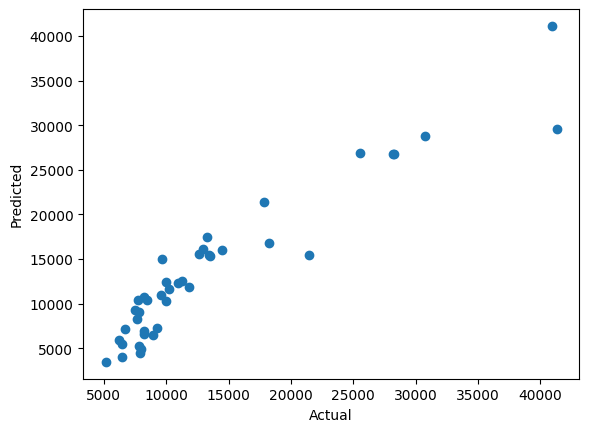

In [32]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

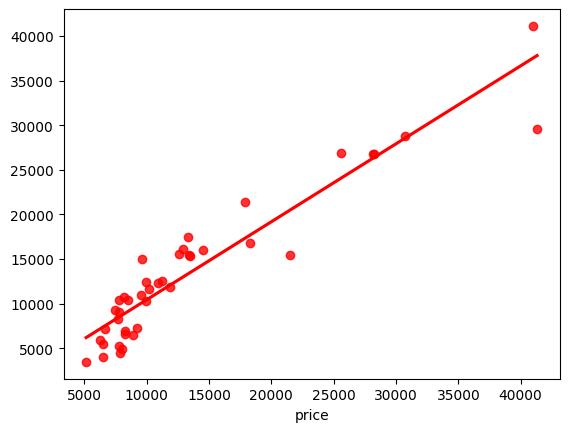

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [34]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
15,30760.000,28798.921387,1961.078613
9,17859.167,21343.550544,-3484.383544
100,9549.000,11022.427576,-1473.427576
132,11850.000,11874.452125,-24.452125
68,28248.000,26801.056808,1446.943192
95,7799.000,5234.288885,2564.711115
159,7788.000,9047.457857,-1259.457857
162,9258.000,7281.992733,1976.007267
147,10198.000,11623.022463,-1425.022463
182,7775.000,10402.617334,-2627.617334
